In [1]:
import pandas as pd
import os 
import numpy as np
import scipy as sp
import scipy.stats as stats
import Bio
import rpy2
%load_ext rpy2.ipython

# Preliminary visualization

In [2]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(destiny)
options(stringsAsFactors = FALSE)
###readin
scdata <- readRDS("scater/cell_phase_normd.rds")

/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: SummarizedExperiment

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: GenomicRanges

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching pack

# Generate plot coordinates in SCE object

In [3]:
%%R

######################
####calculate coordinates for different plot types
scdata <- runDiffusionMap(scdata,exprs_values = "logcounts")
scdata <- runTSNE(scdata,exprs_values='logcounts',perplexity = 30,rand_seed = 123456)
scdata <- runPCA(scdata,exprs_values='logcounts')


Error in runMDS(scdata, exprs_values = "logcounts") : 
  could not find function "runMDS"


/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in runMDS(scdata, exprs_values = "logcounts") : 
  could not find function "runMDS"

  warnings.warn(x, RRuntimeWarning)


In [4]:
%%R

###save file
saveRDS(scdata, file = "scater/ready_for_clustering.rds")

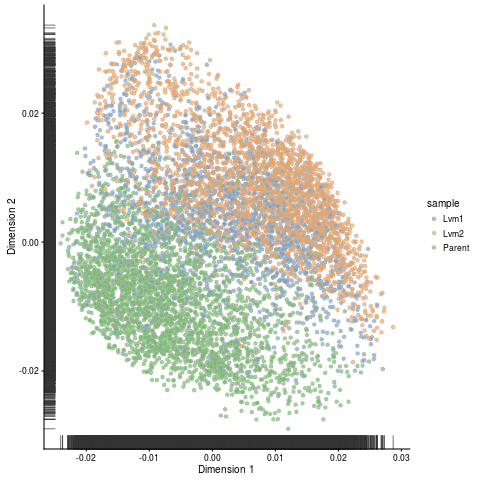

In [15]:
%%R

plotDiffusionMap(
    scdata,
    colour_by = "sample",
    alpha=0.05,
    jitter="jitter",
)

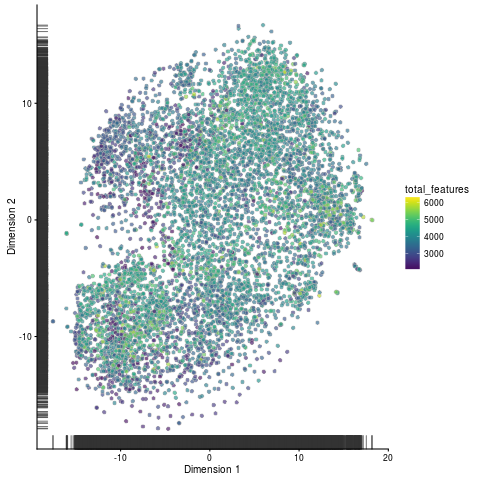

In [22]:
%%R

plotTSNE(
    scdata,
    colour_by = "total_features",
    alpha=0.05,
    jitter="jitter"
)

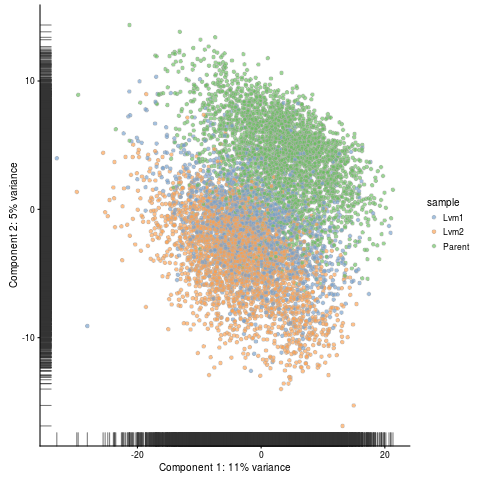

In [19]:
%%R

plotPCA(
    scdata,
    colour_by = "sample"
)

# Post-Clustering Visualization

In [2]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
###readin
scdata <- readRDS("scater/sc3_clustered.rds")

/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: SummarizedExperiment

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: GenomicRanges

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching pack

[1] "k = 3-20"


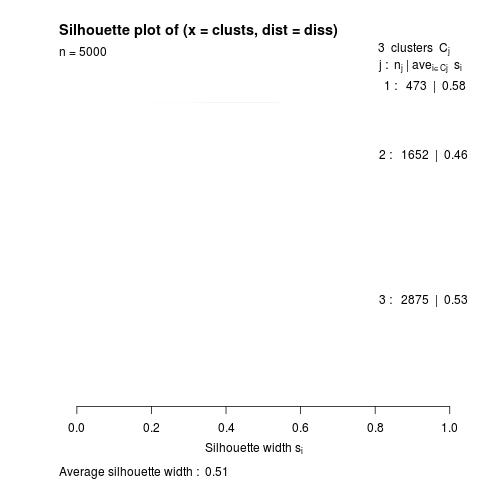

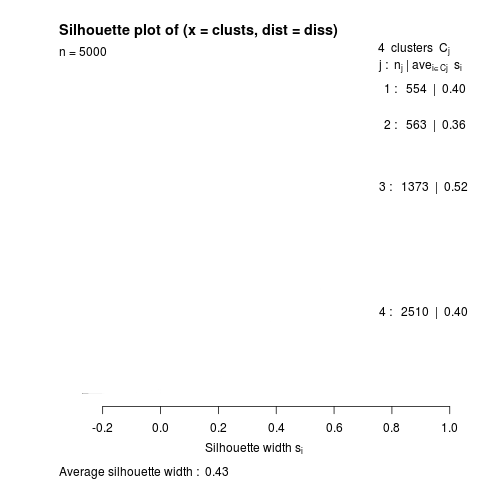

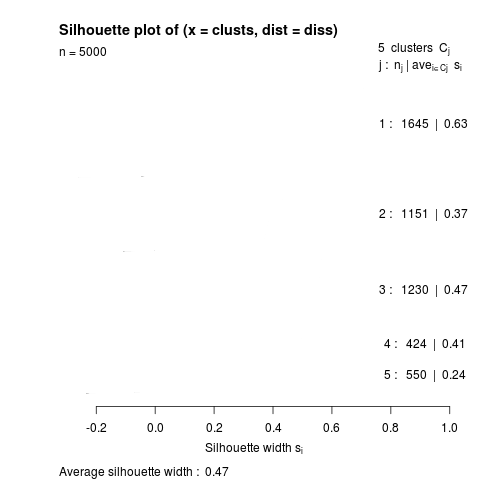

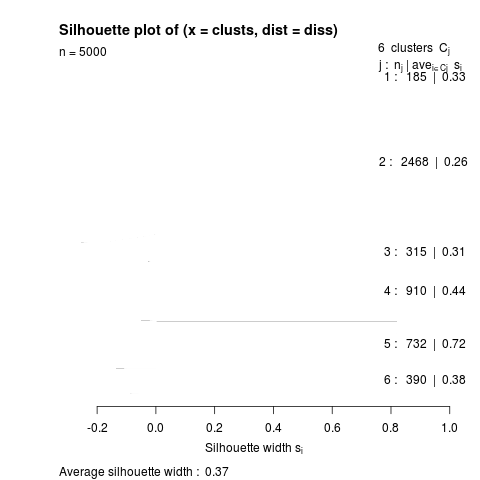

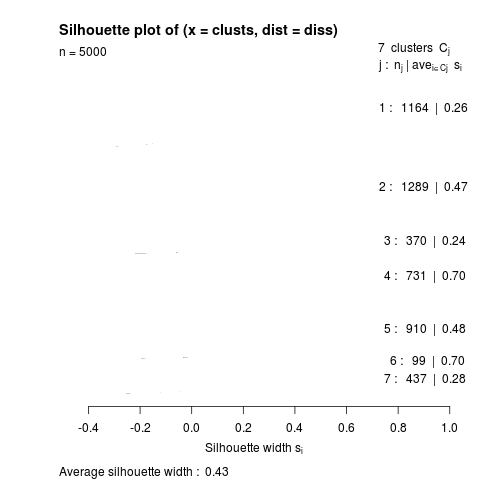

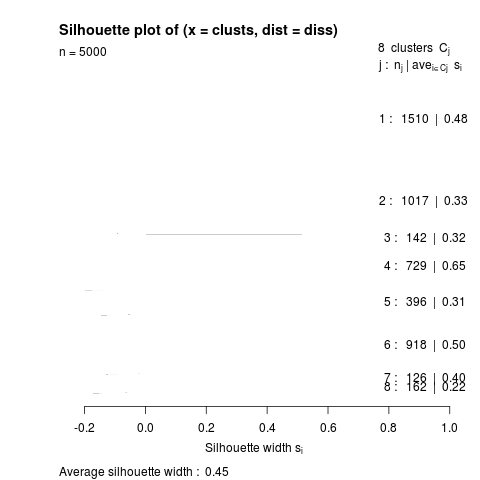

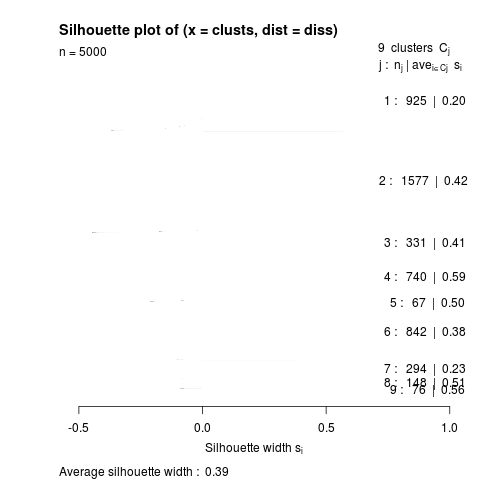

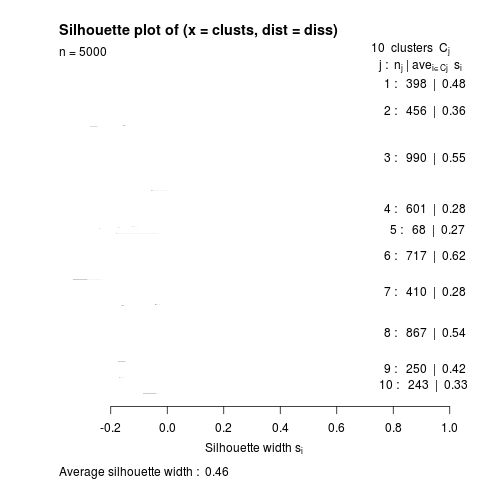

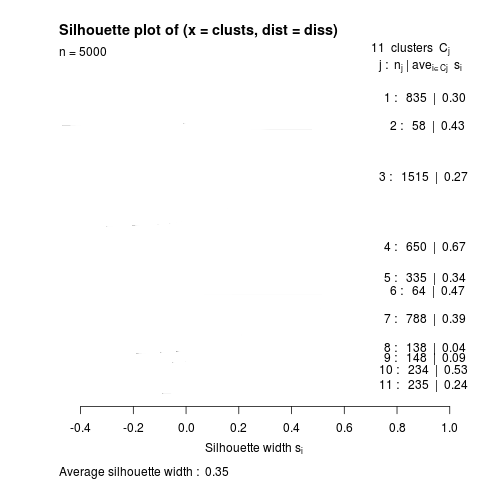

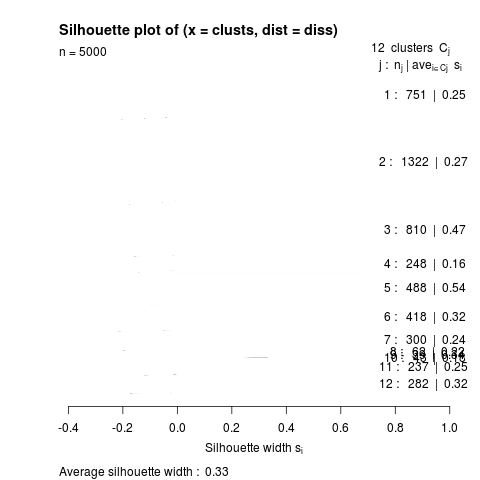

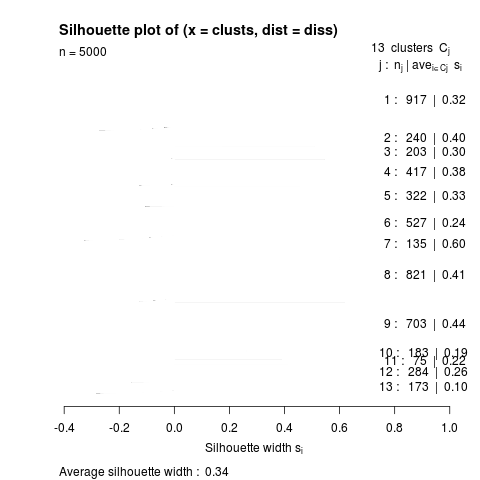

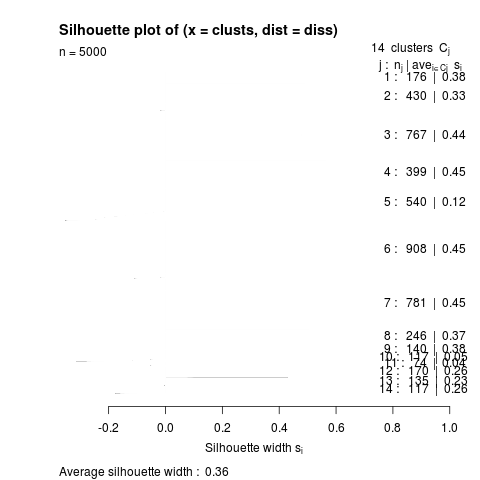

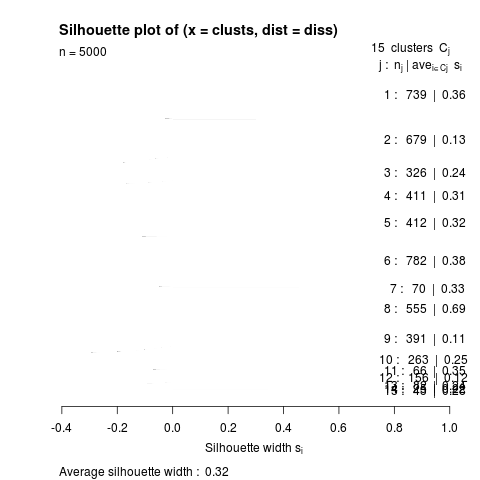

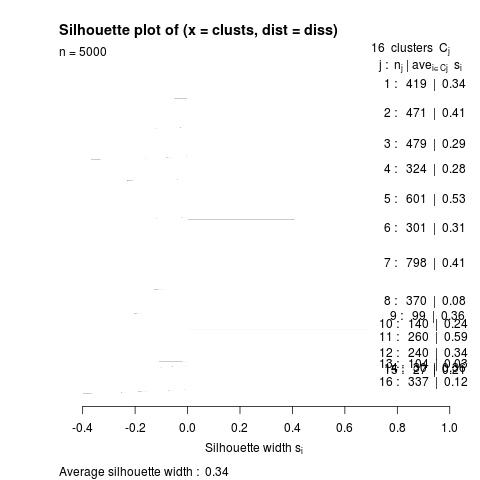

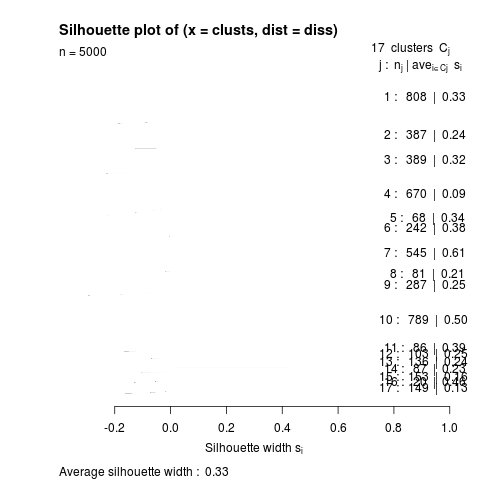

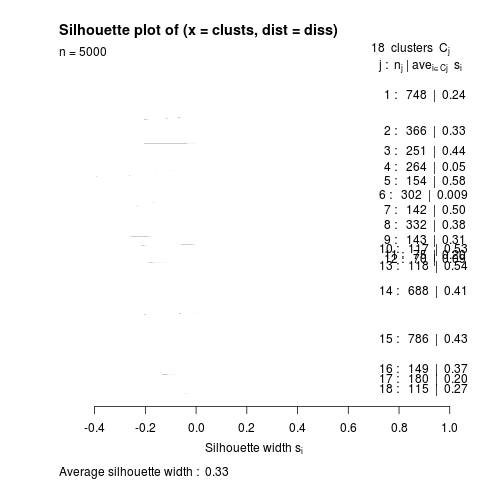

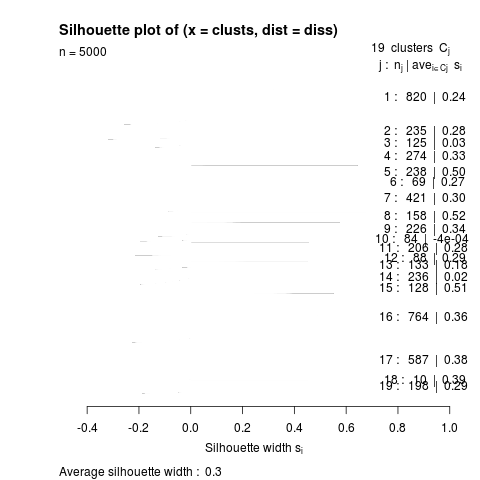

In [12]:
%%R

print("k = 3-20")
for (i in 3:19){
    sc3_plot_silhouette(scdata,k=i)
}


Visualize 10 clusters

In [3]:
%%R

###subset by not NA
scdata.qc <- scdata[ , !is.na(colData(scdata)$sc3_10_clusters)]
####calculate coordinates for different plot types
scdata.qc <- runDiffusionMap(scdata.qc,exprs_values = "logcounts",rerun=TRUE)
scdata.qc <- runTSNE(scdata.qc,exprs_values='logcounts',perplexity = 30,rand_seed = 123456,rerun=TRUE)
scdata.qc <- runPCA(scdata.qc,exprs_values='logcounts',rerun=TRUE)
###save file
saveRDS(scdata, file = "scater/sc3_clustered_vis.rds")


Error: length(list(...)) == 0L is not TRUE


/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error: length(list(...)) == 0L is not TRUE

  warnings.warn(x, RRuntimeWarning)


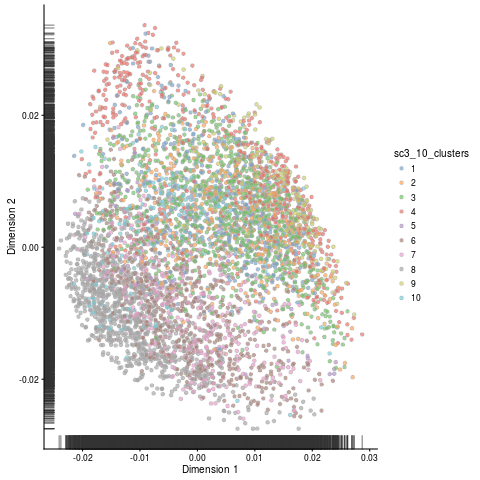

In [14]:
%%R

plotDiffusionMap(
    scdata.qc,
    colour_by = "sc3_10_clusters",
)

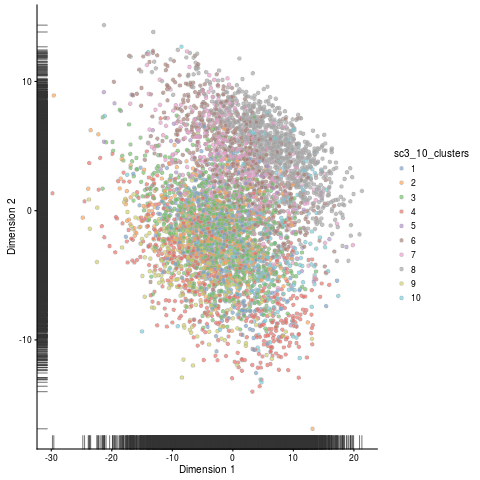

In [15]:
%%R

plotPCA(
    scdata.qc,
    colour_by = "sc3_10_clusters"
)

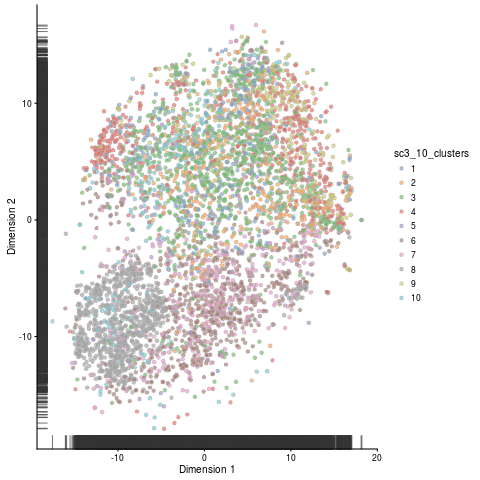

In [16]:
%%R

plotTSNE(
    scdata.qc,
    colour_by = "sc3_10_clusters",
)

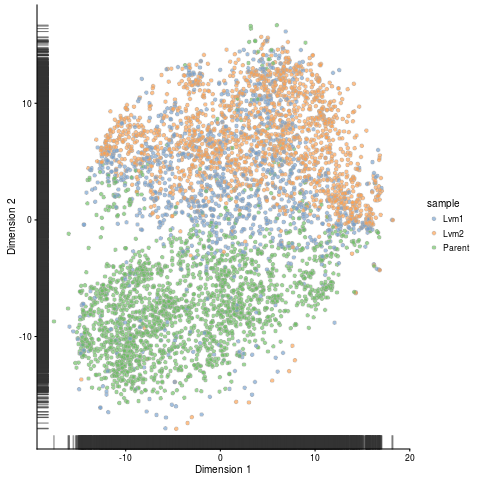

In [17]:
%%R


plotTSNE(
    scdata.qc,
    colour_by = "sample",
)

Reclustered from 20-40 = k

In [18]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
###readin
scdata_many <- readRDS("scater/sc3_clustered_20to40.rds")

visualize 35 clusters

In [19]:
%%R

###subset by not NA
scdata_many.qc <- scdata_many[ , !is.na(colData(scdata_many)$sc3_35_clusters)]
####calculate coordinates for different plot types
scdata_many.qc <- runDiffusionMap(scdata_many.qc,exprs_values = "logcounts",rerun=TRUE)
scdata_many.qc <- runTSNE(scdata_many.qc,exprs_values='logcounts',perplexity = 30,rand_seed = 123456,rerun=TRUE)
scdata_many.qc <- runPCA(scdata_many.qc,exprs_values='logcounts',rerun=TRUE)
###save file
saveRDS(scdata_many.qc, file = "scater/sc3_clustered_20to40_vis.rds")


Error: length(list(...)) == 0L is not TRUE
